In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

In [89]:
library(ISLR)
library(ISLR2)
library(ggplot2)
library(boot)
set.seed(1)
Default

default,student,balance,income
<fct>,<fct>,<dbl>,<dbl>
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559
No,No,825.5133,24905.227
No,Yes,808.6675,17600.451
No,No,1161.0579,37468.529


(a) Fit a logistic regression model that uses income and balance to
predict default.

In [90]:
res_model = glm(default ~ income + balance, data=Default, family="binomial")
summary(res_model)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


In [91]:
#P~0.5 = 1/(1+exp(-(A+B1*X1+B2*X2)))
#P = 0.5 + 0.5 * exp(A+BX) = exp(a+BX)
#0.5 = 0.5 * exp(A+BX)
#1 = exp(A+BX)
#A + B1*X1 + B2*X2 = 0; is the plane!
#choose value for X1 -> X2 = -1/B2 * (A + B1 * X1) / B2
plot_x <- c(min(Default$income), max(Default$income))
plot_y <- (-1 /coef(res_model)[3]) * (coef(res_model)[2] * plot_x + coef(res_model)[1])
db.data <- data.frame(rbind(plot_x, plot_y))
colnames(db.data) <- c('x','y')
db.data
coef(res_model)


,x,y
,<dbl>,<dbl>
plot_x,771.9677,73554.233
plot_y,2040.7640,1772.569


(Intercept)        income       balance 
-1.154047e+01  2.080898e-05  5.647103e-03

In [92]:
1/ (1+exp(-1*(coef(res_model)[1] + coef(res_model)[2] * 50000 + coef(res_model)[3] * 5000)))

(Intercept) 
          1

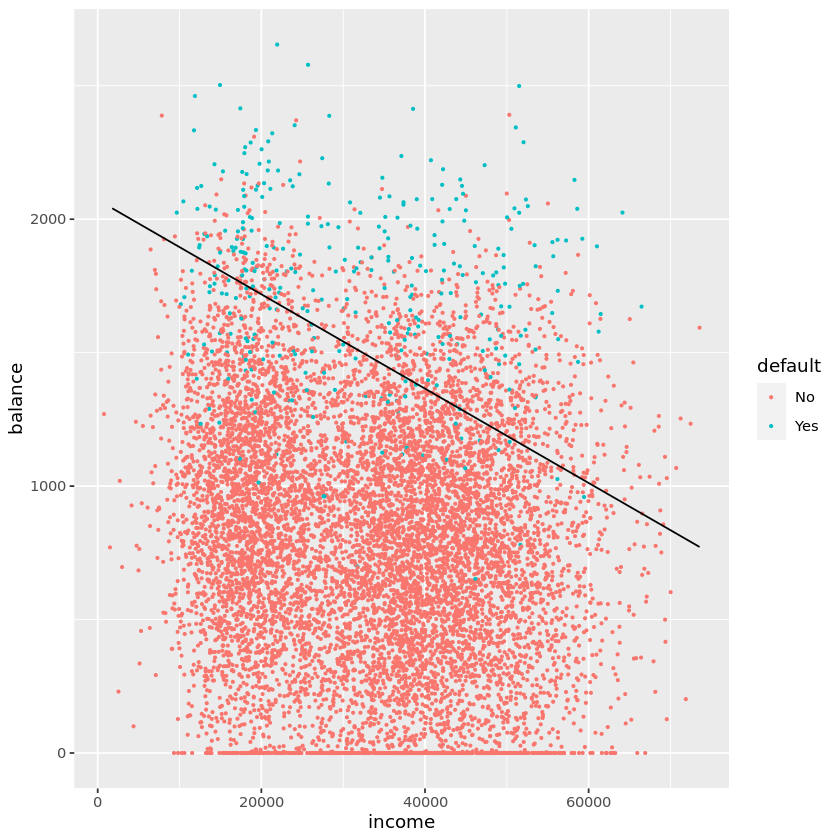

In [93]:
chart = ggplot(Default, aes(x=income, y=balance)) + 
geom_point(aes(color=default), size=0.5)
chart + geom_line(data=db.data, aes(x=y, y=x))

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

In [125]:
train <- sample(nrow(Default), 0.5*nrow(Default))

ii. Fit a multiple logistic regression model using only the training observations.


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2568  -0.1277  -0.0472  -0.0162   3.4109  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.215e+01  6.571e-01 -18.487   <2e-16 ***
income       1.836e-05  7.188e-06   2.555   0.0106 *  
balance      6.059e-03  3.451e-04  17.555   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1477.1  on 4999  degrees of freedom
Residual deviance:  740.0  on 4997  degrees of freedom
AIC: 746

Number of Fisher Scoring iterations: 8


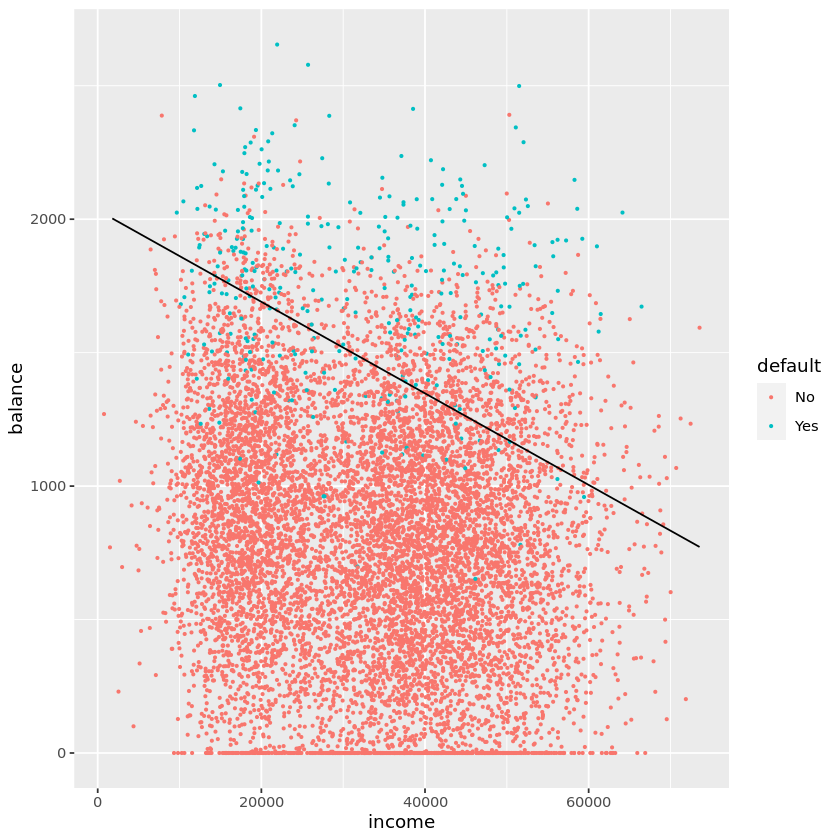

In [126]:
res_model = glm(default ~ income + balance, data=Default, family="binomial", subset=train)
summary(res_model)
plot_x <- c(min(Default$income), max(Default$income))
plot_y <- (-1 /coef(res_model)[3]) * (coef(res_model)[2] * plot_x + coef(res_model)[1])
db.data <- data.frame(rbind(plot_x, plot_y))
colnames(db.data) <- c('x','y')
chart = ggplot(Default, aes(x=income, y=balance)) + 
geom_point(aes(color=default), size=0.5)
chart + geom_line(data=db.data, aes(x=y, y=x))

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

In [127]:
res_probs <- predict(res_model, Default, type = "response")[-train]
length(res_probs)

[1] 5000

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

In [128]:
res_pred = as.factor(ifelse(res_probs >= 0.5, "Yes", "No"))
table(res_pred, Default$default[-train])
mean(res_pred == Default$default[-train])

        
res_pred   No  Yes
     No  4813  117
     Yes   23   47

[1] 0.972

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4972  -0.1590  -0.0667  -0.0250   3.6480  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.126e+01  5.851e-01 -19.249  < 2e-16 ***
income       2.472e-05  6.918e-06   3.573 0.000352 ***
balance      5.475e-03  3.035e-04  18.043  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1530.39  on 4999  degrees of freedom
Residual deviance:  852.67  on 4997  degrees of freedom
AIC: 858.67

Number of Fisher Scoring iterations: 8


        
res_pred   No  Yes
     No  4821  102
     Yes   23   54

[1] 0.975

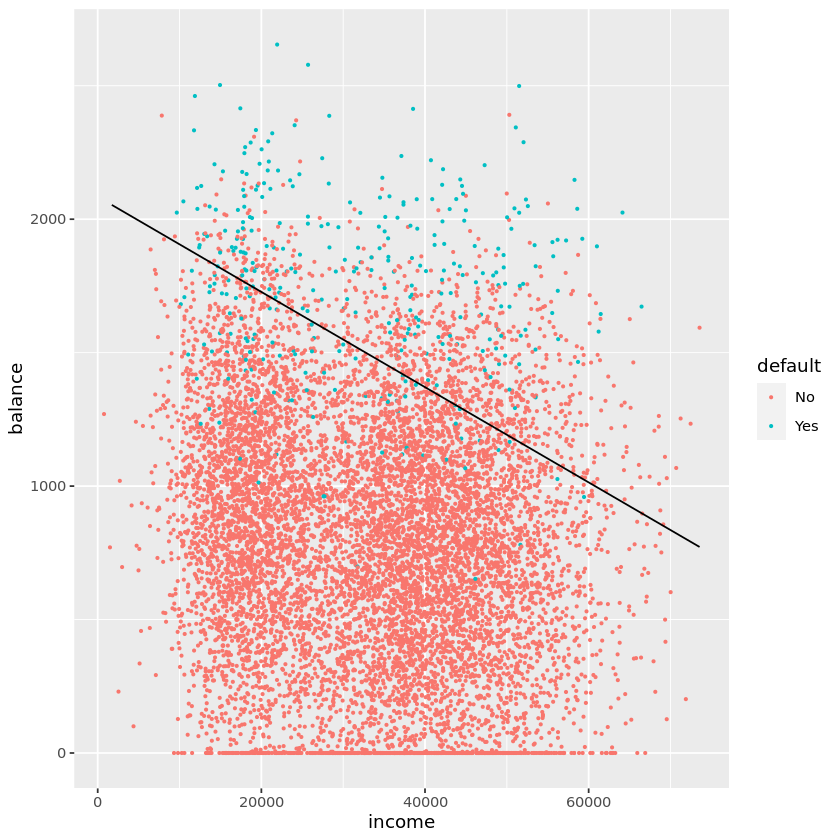

In [131]:
set.seed(101)
train <- sample(nrow(Default), 0.5*nrow(Default))
res_model = glm(default ~ income + balance, data=Default, family="binomial", subset=train)
summary(res_model)
plot_x <- c(min(Default$income), max(Default$income))
plot_y <- (-1 /coef(res_model)[3]) * (coef(res_model)[2] * plot_x + coef(res_model)[1])
db.data <- data.frame(rbind(plot_x, plot_y))
colnames(db.data) <- c('x','y')
chart = ggplot(Default, aes(x=income, y=balance)) + 
geom_point(aes(color=default), size=0.5)
chart + geom_line(data=db.data, aes(x=y, y=x))
res_probs <- predict(res_model, Default, type = "response")[-train]
res_pred = as.factor(ifelse(res_probs >= 0.5, "Yes", "No"))
table(res_pred, Default$default[-train])
mean(res_pred == Default$default[-train])


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0910  -0.1469  -0.0580  -0.0215   3.3139  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.146e+01  6.023e-01 -19.028   <2e-16 ***
income       2.146e-05  6.876e-06   3.122   0.0018 ** 
balance      5.594e-03  3.147e-04  17.775   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1497.19  on 4999  degrees of freedom
Residual deviance:  808.31  on 4997  degrees of freedom
AIC: 814.31

Number of Fisher Scoring iterations: 8


        
res_pred   No  Yes
     No  4825  107
     Yes   14   54

[1] 0.9758

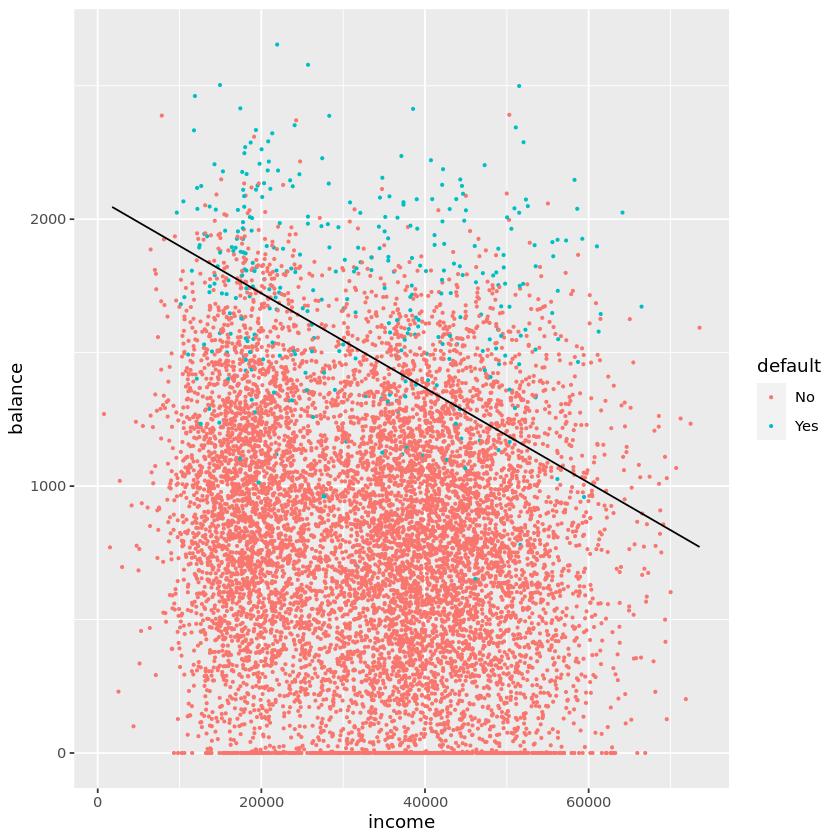

In [132]:
set.seed(11)
train <- sample(nrow(Default), 0.5*nrow(Default))
res_model = glm(default ~ income + balance, data=Default, family="binomial", subset=train)
summary(res_model)
plot_x <- c(min(Default$income), max(Default$income))
plot_y <- (-1 /coef(res_model)[3]) * (coef(res_model)[2] * plot_x + coef(res_model)[1])
db.data <- data.frame(rbind(plot_x, plot_y))
colnames(db.data) <- c('x','y')
chart = ggplot(Default, aes(x=income, y=balance)) + 
geom_point(aes(color=default), size=0.5)
chart + geom_line(data=db.data, aes(x=y, y=x))
res_probs <- predict(res_model, Default, type = "response")[-train]
res_pred = as.factor(ifelse(res_probs >= 0.5, "Yes", "No"))
table(res_pred, Default$default[-train])
mean(res_pred == Default$default[-train])


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5238  -0.1411  -0.0555  -0.0200   3.3420  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.175e+01  6.190e-01 -18.983  < 2e-16 ***
income       2.405e-05  7.118e-06   3.379 0.000727 ***
balance      5.722e-03  3.181e-04  17.989  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1497.19  on 4999  degrees of freedom
Residual deviance:  787.91  on 4997  degrees of freedom
AIC: 793.91

Number of Fisher Scoring iterations: 8


        
res_pred   No  Yes
     No  4824  114
     Yes   15   47

[1] 0.9742

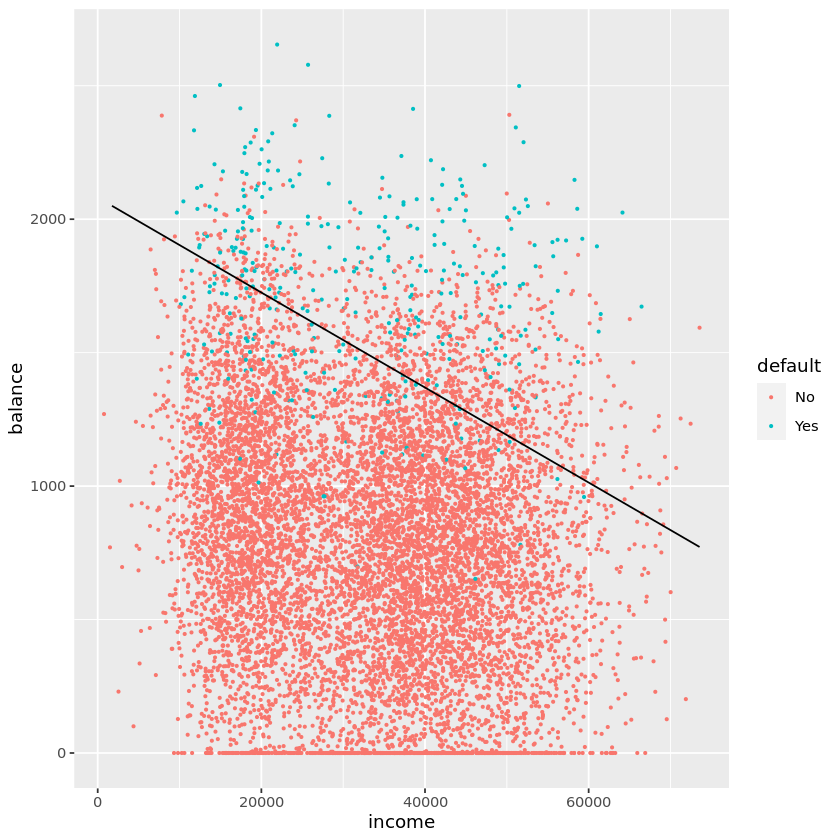

In [133]:
set.seed(1311)
train <- sample(nrow(Default), 0.5*nrow(Default))
res_model = glm(default ~ income + balance, data=Default, family="binomial", subset=train)
summary(res_model)
plot_x <- c(min(Default$income), max(Default$income))
plot_y <- (-1 /coef(res_model)[3]) * (coef(res_model)[2] * plot_x + coef(res_model)[1])
db.data <- data.frame(rbind(plot_x, plot_y))
colnames(db.data) <- c('x','y')
chart = ggplot(Default, aes(x=income, y=balance)) + 
geom_point(aes(color=default), size=0.5)
chart + geom_line(data=db.data, aes(x=y, y=x))
res_probs <- predict(res_model, Default, type = "response")[-train]
res_pred = as.factor(ifelse(res_probs >= 0.5, "Yes", "No"))
table(res_pred, Default$default[-train])
mean(res_pred == Default$default[-train])

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.


Call:
glm(formula = default ~ income + student + balance, family = "binomial", 
    data = Default, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4984  -0.1569  -0.0638  -0.0239   3.6552  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.039e+01  6.586e-01 -15.776  < 2e-16 ***
income       1.133e-06  1.127e-05   0.101  0.91988    
studentYes  -8.627e-01  3.247e-01  -2.657  0.00789 ** 
balance      5.608e-03  3.120e-04  17.975  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1530.4  on 4999  degrees of freedom
Residual deviance:  845.7  on 4996  degrees of freedom
AIC: 853.7

Number of Fisher Scoring iterations: 8


        
res_pred   No  Yes
     No  4821   98
     Yes   23   58

[1] 0.9758

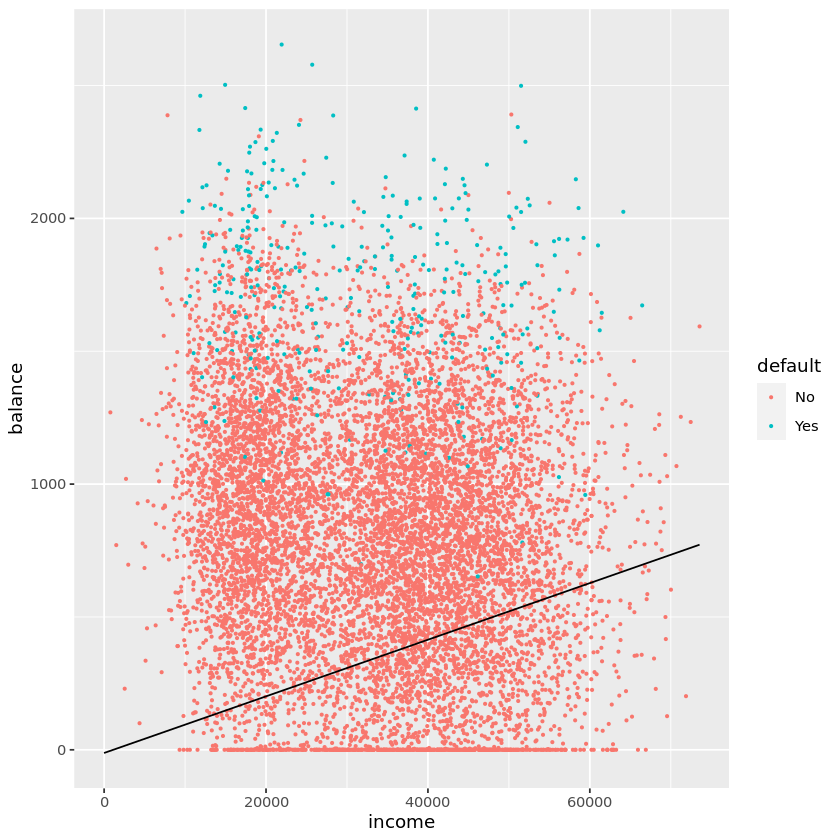

In [134]:
set.seed(101)
train <- sample(nrow(Default), 0.5*nrow(Default))
res_model = glm(default ~ income + student + balance, data=Default, family="binomial", subset=train)
summary(res_model)
plot_x <- c(min(Default$income), max(Default$income))
plot_y <- (-1 /coef(res_model)[3]) * (coef(res_model)[2] * plot_x + coef(res_model)[1])
db.data <- data.frame(rbind(plot_x, plot_y))
colnames(db.data) <- c('x','y')
chart = ggplot(Default, aes(x=income, y=balance)) + 
geom_point(aes(color=default), size=0.5)
chart + geom_line(data=db.data, aes(x=y, y=x))
res_probs <- predict(res_model, Default, type = "response")[-train]
res_pred = as.factor(ifelse(res_probs >= 0.5, "Yes", "No"))
table(res_pred, Default$default[-train])
mean(res_pred == Default$default[-train])

In [ ]:
#does not lead to a test error rate reduction ;it's about the same; but the qualitatively not too bad;

Going to try the bootstrap CV stuff here; because it's great

In [146]:
res_model = glm(default ~ income + balance, data=Default, family="binomial")
cv.err <- cv.glm(Default, res_model, K=2)
1 - cv.err$delta

[1] 0.9785800 0.9785883

also can do a K Folds cycling thorough all 

In [149]:
set.seed(17)
cv.error.10 <- rep(0, 10)
for (i in 2:10) {
  res_model = glm(default ~ income + balance, data=Default, family="binomial")
  cv.error.10[i] <- cv.err <- cv.glm(Default, res_model, K=i)$delta[1]
}
1- cv.error.10

[1] 1.0000000 0.9785036 0.9785489 0.9785145 0.9785540 0.9784972 0.9785549
 [8] 0.9785621 0.9785074 0.9785073